<h1>Reflection-based Optimization<h1>

This small project aim to implement a simple, derivative-free optimization algorithm based on triangle reflection, that I discovered my-self. This optimization algorithm is quite simple, and have many possible improvment such as changing the size of the triangle depending on the slope, adding some stochasticity or generalize it to higher dimensions.

<h3> Reflection function:

In [8]:
import numpy as np
import matplotlib.pyplot as plt


# Function: reflect point P across line through Q and R
def reflect_point_across_line(P, Q, R):
    x0, y0 = P
    x1, y1 = Q
    x2, y2 = R
    
    # Line coefficients: a*x + b*y + c = 0
    a = y1 - y2
    b = x2 - x1
    c = x1*y2 - x2*y1
    
    # Reflection formula
    d = a*a + b*b
    x_ref = x0 - 2*a*(a*x0 + b*y0 + c)/d
    y_ref = y0 - 2*b*(a*x0 + b*y0 + c)/d
    
    return np.array([x_ref, y_ref])



<h3> Visualization:

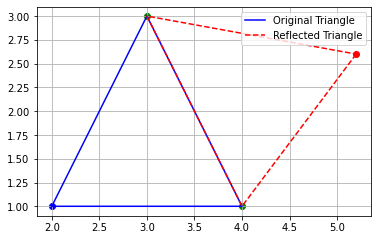

In [11]:
# Triangle vertices
A = np.array([2, 1])
B = np.array([4, 1])
C = np.array([3, 3])

# Reflect A across line BC
A_new = reflect_point_across_line(A, B, C)

# Plot
plt.figure(figsize=(6, 6))
# Original triangle
plt.plot([A[0], B[0], C[0], A[0]], [A[1], B[1], C[1], A[1]], 'b-', label="Original Triangle")
# Reflected triangle
plt.plot([A_new[0], B[0], C[0], A_new[0]], [A_new[1], B[1], C[1], A_new[1]], 'r--', label="Reflected Triangle")
# Points
plt.scatter(*A, color='blue')
plt.scatter(*B, color='green')
plt.scatter(*C, color='green')
plt.scatter(*A_new, color='red')
plt.legend()
plt.gca().set_aspect('equal', 'box')
plt.grid(True)
plt.show()


<h3> Algorithm:

In [9]:
np.random.seed(42)

def f_square(x):
    return (x[0] - 9)**2 + (x[1] - 10)**2

def triangular_optimisation(n, alpha, Beta):
    
    rd_1 = np.random.randint(100)
    
    rd_2 = np.random.randint(100)
    
    
    A, B, C = np.array([rd_1, rd_2]), np.array([rd_1 + alpha, rd_2]), np.array([rd_1 + 0.5*alpha, rd_2 + Beta])
    
    candidates = [
    ("A", A, f_square(A)),
    ("B", B, f_square(B)),
    ("C", C, f_square(C))
    ]
    
    history = []
    
    for i in range(n):
        
        label_1, vec_1, value_1 = min(candidates, key=lambda x: x[2])
        new_candidates = [c for c in candidates if c[0] != label_1]
        label_2, vec_2, value_2 = min(new_candidates, key=lambda x: x[2])
        label_3, vec_3, value_3 = max(candidates, key=lambda x: x[2])
        
        D = reflect_point_across_line(vec_3, vec_2, vec_1)

        candidates = [
        ("A", vec_1, f_square(vec_1)),
        ("B", vec_2, f_square(vec_2)),
        ("C", D, f_square(D))
        ]
        
        history.append([vec_1.copy(), vec_2.copy(), D.copy()])
    optimal, optimal_vec, optimal_value = min(candidates, key=lambda x: x[2])
    
    return optimal_vec, optimal_value, history


#triangle size (2, 3)
optimal_vec, optimal_value, history = triangular_optimisation(1000, 2, 3)

print(f"Suboptimal value is: {optimal_value}, obtained at the point:{optimal_vec}")

Suboptimal value is: 0.6400000005793851, obtained at the point:[ 8.52 10.64]


<h3> Visualization with size parameter (2, 3): it converges

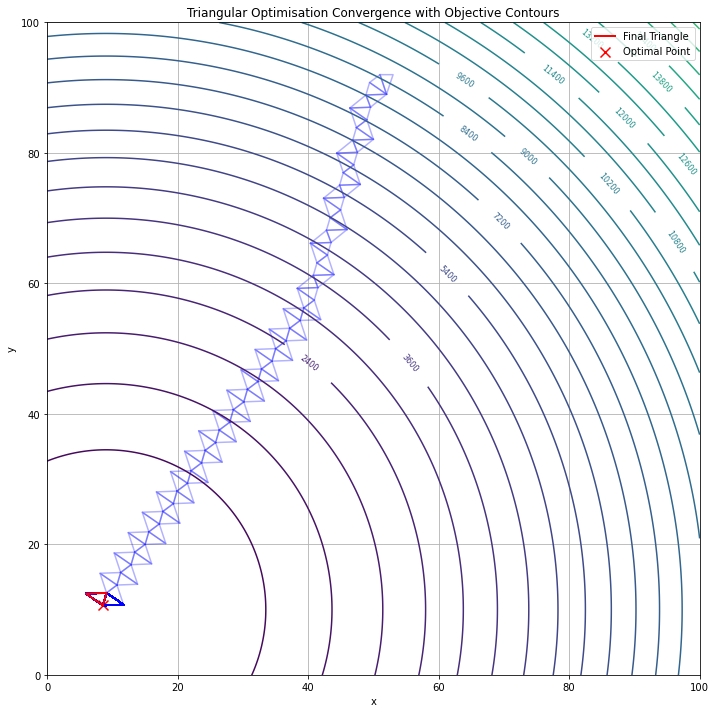

In [10]:
# Plot convergence of triangles
plt.figure(figsize=(12, 12))
for i, triangle in enumerate(history):
    tri = np.array(triangle + [triangle[0]])  # close the loop
    plt.plot(tri[:, 0], tri[:, 1], alpha=0.3, color="blue")

# Plot final triangle in red
final = np.array(history[-1] + [history[-1][0]])
plt.plot(final[:, 0], final[:, 1], 'r-', lw=2, label="Final Triangle")

plt.scatter(optimal_vec[0], optimal_vec[1], c="red", s=100, marker="x", label="Optimal Point")

# Generate contour data
x = np.linspace(-100, 100, 400)
y = np.linspace(-100, 100, 400)
X, Y = np.meshgrid(x, y)
Z = (X - 9)**2 + (Y - 10)**2  # <-- fixed

# Draw contours of f_square
contours = plt.contour(X, Y, Z, levels=40, cmap="viridis")
plt.clabel(contours, inline=True, fontsize=8)

# Add labels and style
plt.xlabel("x")
plt.ylabel("y")
plt.title("Triangular Optimisation Convergence with Objective Contours")
plt.legend()
plt.gca().set_aspect("equal", "box")
plt.xlim(0, 100)
plt.ylim(0, 100)
plt.grid(True)
plt.show()



<h3> Visualization with size parameter (2, 20): It doesn't converges, and get stuck in an "equilibrium"

Suboptimal value is: 5245.699961325185, obtained at the point:[33.00317566 78.33408754]


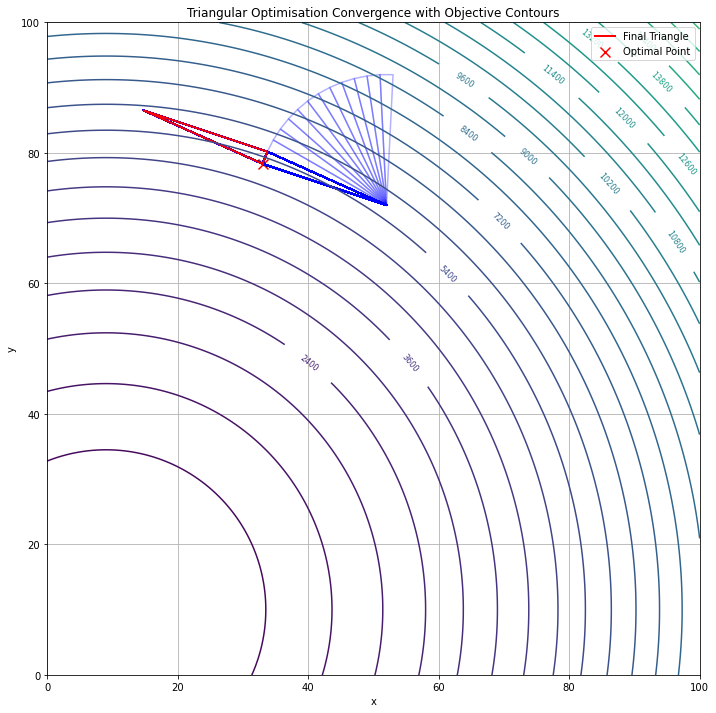

In [19]:
np.random.seed(42)

#triangle size (2, 20)
optimal_vec, optimal_value, history = triangular_optimisation(1000, 2, 20)

print(f"Suboptimal value is: {optimal_value}, obtained at the point:{optimal_vec}")

# Plot convergence of triangles
plt.figure(figsize=(12, 12))
for i, triangle in enumerate(history):
    tri = np.array(triangle + [triangle[0]])  # close the loop
    plt.plot(tri[:, 0], tri[:, 1], alpha=0.3, color="blue")

# Plot final triangle in red
final = np.array(history[-1] + [history[-1][0]])
plt.plot(final[:, 0], final[:, 1], 'r-', lw=2, label="Final Triangle")

plt.scatter(optimal_vec[0], optimal_vec[1], c="red", s=100, marker="x", label="Optimal Point")

# Generate contour data
x = np.linspace(-100, 100, 400)
y = np.linspace(-100, 100, 400)
X, Y = np.meshgrid(x, y)
Z = (X - 9)**2 + (Y - 10)**2  # <-- fixed

# Draw contours of f_square
contours = plt.contour(X, Y, Z, levels=40, cmap="viridis")
plt.clabel(contours, inline=True, fontsize=8)

# Add labels and style
plt.xlabel("x")
plt.ylabel("y")
plt.title("Triangular Optimisation Convergence with Objective Contours")
plt.legend()
plt.gca().set_aspect("equal", "box")
plt.xlim(0, 100)
plt.ylim(0, 100)
plt.grid(True)
plt.show()

<h3> Visualization with size parameter (30, 20): It converges fast, but has low precision

Suboptimal value is: 130.39310079999956, obtained at the point:[ 8.2316544 21.3931008]


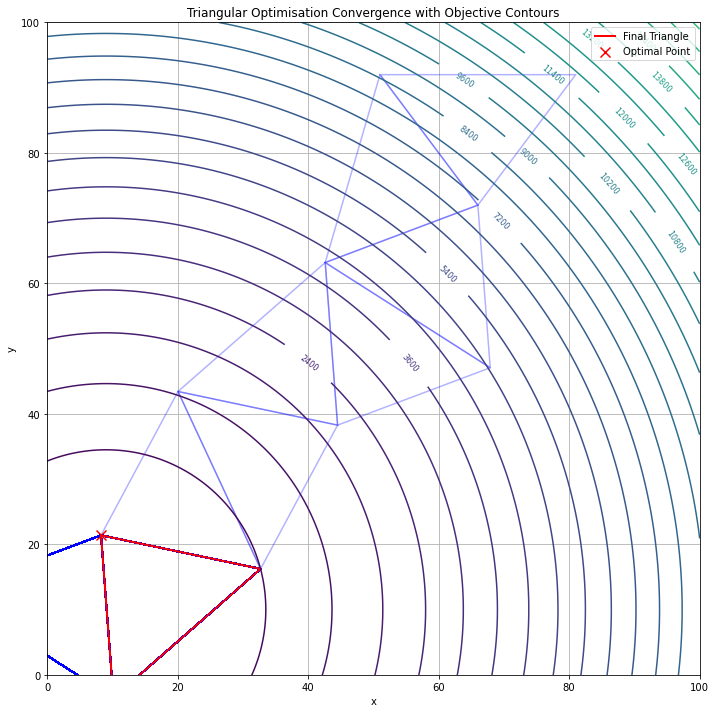

In [20]:
np.random.seed(42)

#triangle size (2, 20)
optimal_vec, optimal_value, history = triangular_optimisation(1000, 30, 20)

print(f"Suboptimal value is: {optimal_value}, obtained at the point:{optimal_vec}")

# Plot convergence of triangles
plt.figure(figsize=(12, 12))
for i, triangle in enumerate(history):
    tri = np.array(triangle + [triangle[0]])  # close the loop
    plt.plot(tri[:, 0], tri[:, 1], alpha=0.3, color="blue")

# Plot final triangle in red
final = np.array(history[-1] + [history[-1][0]])
plt.plot(final[:, 0], final[:, 1], 'r-', lw=2, label="Final Triangle")

plt.scatter(optimal_vec[0], optimal_vec[1], c="red", s=100, marker="x", label="Optimal Point")

# Generate contour data
x = np.linspace(-100, 100, 400)
y = np.linspace(-100, 100, 400)
X, Y = np.meshgrid(x, y)
Z = (X - 9)**2 + (Y - 10)**2  # <-- fixed

# Draw contours of f_square
contours = plt.contour(X, Y, Z, levels=40, cmap="viridis")
plt.clabel(contours, inline=True, fontsize=8)

# Add labels and style
plt.xlabel("x")
plt.ylabel("y")
plt.title("Triangular Optimisation Convergence with Objective Contours")
plt.legend()
plt.gca().set_aspect("equal", "box")
plt.xlim(0, 100)
plt.ylim(0, 100)
plt.grid(True)
plt.show()